In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("..\\DATA\\heart.csv")

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


<AxesSubplot:xlabel='target', ylabel='count'>

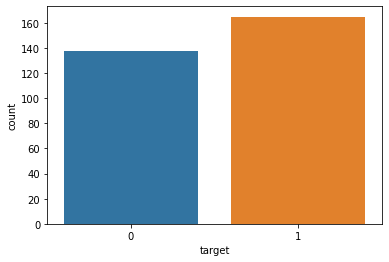

In [18]:
# Some Data Visualization :
sns.countplot(data=df,x = 'target')

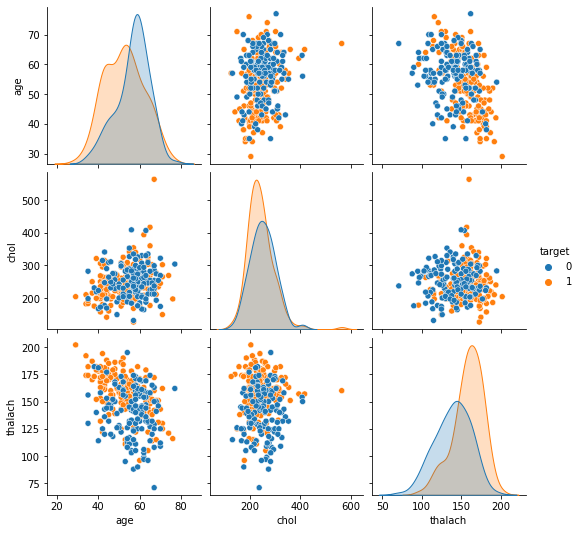

In [20]:
sns.pairplot(df[['age','chol','thalach','target']],hue='target')

<AxesSubplot:>

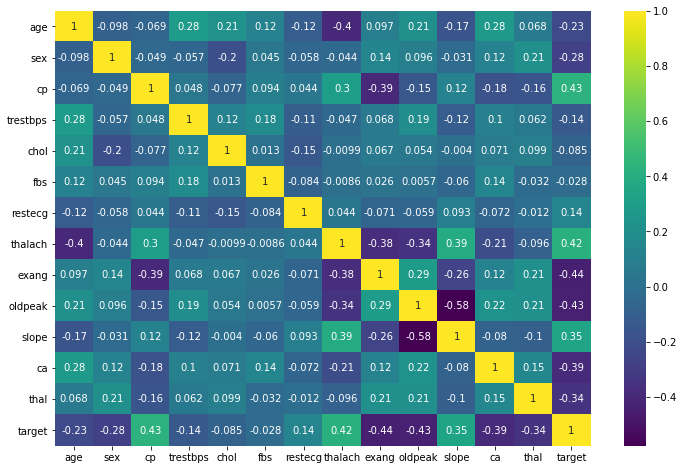

In [25]:
# Heat map of correlation between the features
fig = plt.figure(figsize=(12,8))
sns.heatmap(data = df.corr(),annot = True,cmap = 'viridis')

In [ ]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('target',axis = 1)
y = df['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                    test_size=0.10, random_state=101)

In [9]:
from sklearn.preprocessing import StandardScaler


In [10]:
scaler = StandardScaler()

In [11]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegressionCV

In [13]:
log_model = LogisticRegressionCV()

In [14]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [15]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [16]:
log_model.C_ # Best Value for C Parameter

array([0.04641589])

In [17]:
log_model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

In [27]:
# Performance Evaluation :
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,plot_roc_curve,confusion_matrix,plot_precision_recall_curve

In [26]:
y_preds = log_model.predict(scaled_X_test)

In [28]:
confusion_matrix(y_test,y_preds)

array([[11,  4],
       [ 1, 15]], dtype=int64)

In [43]:
accuracy_score(y_test,y_preds) * 100

83.87096774193549

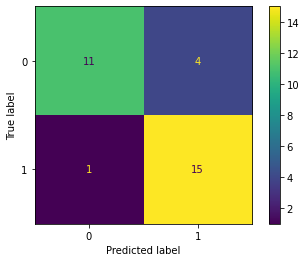

In [29]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [30]:
classification_report(y_test,y_preds)

'              precision    recall  f1-score   support\n\n           0       0.92      0.73      0.81        15\n           1       0.79      0.94      0.86        16\n\n    accuracy                           0.84        31\n   macro avg       0.85      0.84      0.84        31\nweighted avg       0.85      0.84      0.84        31\n'

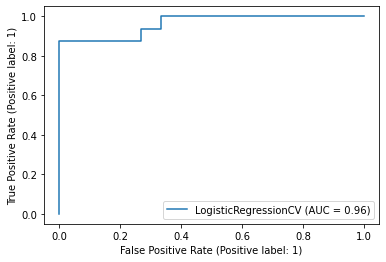

In [31]:
plot_roc_curve(log_model,scaled_X_test,y_test)

In [37]:
# Prediction on a patient :

In [38]:
# Data of patient :
patient = [[54.,1.,0.,122.,286.,0.,0.,116.,1.,3.2,1.,2.,2.]]

In [39]:
log_model.predict(patient)

array([0], dtype=int64)

In [40]:
# 0 indicates that the model has predicted there is no
# presence of heart disease in the patient.

In [41]:
log_model.predict_proba(patient) 
# Probability of the patient being in the particular class(0)

array([[9.99999862e-01, 1.38455917e-07]])